## Importando bibliotecas

In [1]:
# lib para conexão
import requests

# Modelagem de dados
import pandas as pd

# Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

## Leitura dos DataSets

In [2]:
# URL da API da Alesp
URL_Despesas = 'http://www.al.sp.gov.br/repositorioDados/deputados/despesas_gabinetes.xml'
URL_Cadastro = 'https://www.al.sp.gov.br/repositorioDados/deputados/deputados.xml'

# Pegando os dados
Conexao_01 = requests.get( URL_Despesas )
Conexao_02 = requests.get( URL_Cadastro )

# Verificando se a API funcinou
print( Conexao_01, Conexao_02 )

<Response [200]> <Response [200]>


In [3]:
df_despesas = pd.read_xml( Conexao_01.content )

df_cadastro = pd.read_xml( Conexao_02.content )

## Pré analise

In [4]:
df_despesas.head(2)

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.0,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.4,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA


In [5]:
df_despesas.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
df_cadastro.head(3)

In [ ]:
#Procurando por possiveis inconsistência nas colunas:
sorted(pd.unique(df_despesas['Ano'])) #Tudo OK
sorted(pd.unique(df_despesas['Mes'])) #Tudo OK

In [6]:
sorted(pd.unique(df_despesas['Tipo']))

['A - COMBUSTÍVEIS E LUBRIFICANTES',
 'B - LOCAÇÃO E MANUT DE BENS MÓVEIS E IMÓVEIS, CONDOMÍNIOS E OUTROS',
 'C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS',
 'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS',
 'E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO',
 'F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)',
 'G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, INTERNET E SOFTWARES',
 'H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)',
 'I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO',
 'J - SERVIÇOS DE COMUNICAÇÃO',
 'K - LOCAÇÃO DE BENS MÓVEIS',
 'L - LOCAÇÃO DE BENS IMÓVEIS',
 'M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS',
 'N - MORADIA',
 'O - LOCAÇÃO DE VEÍCULO',
 'P - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR']

In [ ]:
#sorted(pd.unique.tolist(df_despesas['Fornecedor']))
sorted(pd.unique(df_despesas['Fornecedor']))

['" A COMADRE LANCHONETE E RESTAURANTE" PEDRO VILLELA  VILHENA - ME.',
 '" VÓ MAPHALDA "  SALADA GRILL',
 '"A TRIBUNA" DE SANTOS JORNAL E EDITORA LTDA',
 '"A VARANDA" - JOSÉ ROBERTO GERALDO - ME',
 '"ESTÂNCIA SERVIÇOS ALIMENTARES" - IVONE MEIRA DA SILVA - ME',
 '"MEGA PARK " ESTACIONAMENTO',
 '"O REI DOS ENVELOPES" GRAF. COMERCIAL E DISTRIBUIDORA LTDA.',
 '"POSTO SÃO SEBASTIÃO" - AUTO POSTO CESTO GARCIA LTDA',
 "'FATOR GRAFICO GRAFICA E EDITORA LTDA -ME",
 "'FREIRE VEÍCULOS",
 '(POSTO MENEGUETTI) AUTO POSTO JOTAVE LTDA',
 ',ARIA HELENA GOMES RESTAURANTE ME',
 ',ARIA JULIA BARNABE BARBOZA - ME',
 ',AUTO POSTO CENTER LESTE LTDA',
 ',AUTO POSTO ITAPURA',
 ',FENIX AUTO POSTO DE SERVIÇOS LTDA',
 ',ODELO PAPELARIA E LIVRARIA LTDA',
 ',POSTO DE SERVIÇOS MARIANA LTDA',
 ",POSTO DE SERVIÇOS PAP'S ENSEADA LTDA",
 ',RONER PIRES NUNES - ME',
 '-AUTO POSTO MOEMA DA FRONTEIRA LTDA',
 '.K.F. COMÉRCIO DE ALIMENTOS LTDA',
 ".MCDONALD'S COMÉRCIO DE ALIMENTOS LTDA.",
 '.POSTO PARQUE TAQUARAL LTDA',
 '.RO

In [ ]:
#sorted(pd.unique(df_despesas_2019a2022.loc[df_despesas_2019a2022['Ano']>2018]))
sorted(pd.tolist(df_despesas_2019a2022['Fornecedor']))

## Tratamento de inconstancia Fornecedor: Itens IGUAIS com nomes DIFERENTES

In [ ]:
df_despesas.Fornecedor.replace('PEDAGIO', 'PEDAGIO', inplace=True)
df_despesas.Fornecedor.replace('PEDAGIOS','PEDAGIO', inplace=True)
df_despesas.Fornecedor.replace('PEDÁGIO','PEDAGIO', inplace=True)
df_despesas.Fornecedor.replace('PEDÁGIOS','PEDAGIO', inplace=True)
df_despesas.Fornecedor.replace('PEGAGIO','PEDAGIO', inplace=True)

In [ ]:
df_despesas.Fornecedor.replace('TAXI', 'TAXI', inplace=True)
df_despesas.Fornecedor.replace('TÁXI', 'TAXI', inplace=True)
df_despesas.Fornecedor.replace('taxi', 'TAXI', inplace=True)
df_despesas.Fornecedor.replace('Taxi', 'TAXI', inplace=True)
df_despesas.Fornecedor.replace('táxi', 'TAXI', inplace=True)
df_despesas.Fornecedor.replace('Táxi', 'TAXI', inplace=True)

In [8]:
df_despesas.Fornecedor.replace('ACADEMIA  DA GULA DOCES E SALGADOS LTDA-ME', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DA GULA', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DA GULA DOCES E SALGADOS LTDA', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DA GULA DOCES E SALGADOS LTDA ME', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DA GULA DOCES E SALGADOS LTDA-ME.', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DA GULA DOCES E SALGADOS LTDA. - ME', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DA GULA DOCES E SALGADOS LTDA. ME', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)
df_despesas.Fornecedor.replace('ACADEMIA DE GULA DOCES E SALGADOS LTDA -ME', 'ACADEMIA  DA GULA DOCES E SALGADOS LTDA', inplace=True)


Como existiam varios tabeliao/tabelionato de notas sem uma precisão da descrição/localização será substituida por apenas "tabelionato".

In [7]:
df_despesas.Fornecedor.replace('1 TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 TABELIAO DE NOTAS E DE PROTESTOS DE LETRAS E TITULOS DE AMERICANA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 TABELIAO DE NOTAS E PROTESTOS DE ATIBIA LTDA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 TABELIAO NOTA DE MAUA - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 TABELIONATO DE NOTAS DE DIADEMA-SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 TABELIONATO DE NOTAS E ANEXOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1 º TABELIAO NOTAS DE SANTOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1. TABELIÃO DE NOTAS DE PIRACICABA - SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('10 TABILIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('11 TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('11 º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('11º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('11º.TABELIAO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('13 TABELIONATO DE SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('13.TABELIONATO DE SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('13º TABELIÃO DE NOTAS DE SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14 TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14 TABELIONATO DE NOTAS VAMPRÉ', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14 º TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14O. TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14º TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14º TABELIONATO DE NOTAS VAMPRE', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('14º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('15 TABELIÃO OLIVEIRA LIMA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('16. TABELIAO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('16º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('17 CARTORIO BELA VISTA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '17 TABELIAO DE NOTAS DA CAPITAL - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '17 TABELIÃO DE NOTAS DA CAPITAL - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '17. TABELIÃO DE NOTAS - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '17º TABEIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '17º TABELIÃO DE NOTAS - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '17º TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('19 º TABELIÃO DE NOTAS DE SANTOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1ª TABELIAO DE NOTAS E DE PROTESTO DE L E TIT DE GUARUJA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1° TABELIÃO DE NOTAS E DE PROTESTO DE SUZANO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('1º TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIAO DE NOTAS E DE PROTESTOS - BEL. DENILSON DANIEL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIAO DE NOTAS E PROTESTO DE SUZANO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS DA  CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS DE CAMPINAS - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS DE CAMPINAS -SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS E DE PROTESTOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS E PROTESTO DE ATIBAIA-SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS E PROTESTOS DE AMERICANA SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO DE NOTAS E PROTESTOS DE LETRAS E TITULOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '1º TABELIÃO RIBEIRÃO PRETO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('2 TABELIAO DE NOTAS DA COMARCA DE OSASCO SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2 TABELIAO DE NOTAS SUZANO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2 TABELIÃO DE NOTAS E DE PROTESTO DE LETRAS E TITULOS DE ARARAQUARA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('2. TABELIÃO DE NOTAS DE PIRACICABA - SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('20º TABELIAO DE NOTAS CAP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('21 TABELIAO DE NOTAS LIBERO BADARO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('22 TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '22 TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '22. TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('22º TABELIONATO DE NOTAS - SECÇÃO FIRMAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '22º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '22º TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('23 TABELIAO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('23º TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('24 TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('25 TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '26 TABELIAO DE NOTAS DE SAO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('27 TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '27. TABELIÃO DE NOTAS - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '27º TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '29 TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '29° TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('2º TABELIAO DE NOTAS DE CAMPINAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIAO DE NOTAS E PROTESTO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIONATO DE NOTAS DE ATIBAIA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIONATO DE NOTAS DE SANTO ANDRÉ', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIONATO DE NOTAS E DE PROTESTO DE LETRAS E TÍTULO DE DE ITAPIRA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS DE CAMPINAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS DE RIBEIRÃO PRETO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS DE S. CAETANO DO SUL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS DE SOROCABA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS E DE PROTESTO DE LETRAS E TÍTULOS DE SALTO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '2º TABELIÃO DE NOTAS E DE PROTESTO DE PRES PRUDENTE ANDRE MACHADO DE SOUZA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('3 TABELIAO DE NOTAS DE CAMPINAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3 TABELIONATO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3 TABELIÃO DE NOTAS E PROTESTOS DE ARARAQUARA S/P', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '30º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '30º TABELIÃO DE NOTAS - OSVALDO FERNANDES TESTONI', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '32º TABELIONATO DE NOTAS DR. DECIO BRANCO LUZ', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('"3º TABELEÃO DE NOTAS DE SANTOS"', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIAO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIAO DE NOTAS DE CAMPINAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIONATO DE NOTAS DE GUARULHOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS - RIBEIRÃO PRETO - SP.', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS - SÃO BERNARDO DO CAMPO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS COMARCA RIO CLARO ESTADO DE SAO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS DE RIBEIRÃO PRETO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS DE S.B.C. - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '3º TABELIÃO DE NOTAS DE SÃO BERNARDO DO CAMPO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('4 TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4 TABELIAO DE NOTAS E DE PROTESTO DE LETRAS E TITULOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4 TABELIONATO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4 TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4 TABELIÃO DE NOTAS DE S CAETANO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('4. TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('4º TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIONATO DE NOTAS DE RIBEIRÃO PRETO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIONATO DE NOTAS DE SANTOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE NOTAS DA CAPITAL - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE NOTAS DE GUARULHOS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE NOTAS DE OSASCO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE NOTAS DE SOROCABA', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE NOTAS DE SÃO JOSÉ DO RIO PRETO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '4º TABELIÃO DE OSASCO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('5º TABELIÃO DE NOTAS CAMPINAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '5º TABELIÃO DE NOTAS DE SANTO ANDRÉ', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '5º TABELIÃO DE NOTAS DE SÃO PAULO - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '6 TABELIAO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '6 TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '6 TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '6.º TABELIÃO DE NOTAS DA CAPITAL DE SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('6º TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('7 TABELIAO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '7 TABELIÃO DE NOTAS DA CAPITAL - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '7º TABELIAO DE NOTAS DE CAMPINAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '7º TABELIÃO DE NOTAS DA CAPITAL - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '8 TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '8 TABELIÃO DE NOTAS DE SÃO PAULO', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '8. TABELIÃO DE NOTAS', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '80º TABELIÃO DE NOTAS DOUGLAS EDUARDO DUALIBI', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace( '8º TABELIÃO DE NOTAS DA CAPITAL', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('9 TABELIÃO DE NOTAS - SP', 'TABELIONATO DE NOTAS', inplace=True)
df_despesas.Fornecedor.replace('9º TABELIÃO DE NOTAS - SP', 'TABELIONATO DE NOTAS', inplace=True)

In [9]:
df_despesas.Fornecedor.replace('"O BRASEIRO" GALETO NA BRASA LTDA', 'O BRASEIRO - GALETO NA BRASA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '"O BRAZEIRO" GALETO NA BRASA LTDA', 'O BRASEIRO - GALETO NA BRASA LTDA', inplace=True)

In [10]:
df_despesas.Fornecedor.replace('948 ESFIHARIA E ROTESSERIE LTDA ME', 'ESFIHARIA E ROTESSERIE LTDA', inplace=True)
df_despesas.Fornecedor.replace( '948 ESFIHARIA E ROTISSERIA LTDA - ME', 'ESFIHARIA E ROTESSERIE LTDA', inplace=True)
df_despesas.Fornecedor.replace( '948 ESFIRA E ROTISSERIE', 'ESFIHARIA E ROTESSERIE LTDA', inplace=True)

In [11]:
df_despesas.Fornecedor.replace('96 AUTO POSTO LT', 'AUTO POSTO LTDA', inplace=True)
df_despesas.Fornecedor.replace( '96 AUTO POSTO LTDA', 'AUTO POSTO LTDA', inplace=True)

In [12]:
df_despesas.Fornecedor.replace('360 LOCAÇOES EIRELI - ME', '360 LOCAÇÕES EIRELI', inplace=True)
df_despesas.Fornecedor.replace( '360 LOCAÇÕES  EIRELI- ME', '360 LOCAÇÕES EIRELI', inplace=True)
df_despesas.Fornecedor.replace( '360 LOCAÇÕES EIRELI - ME', '360 LOCAÇÕES EIRELI', inplace=True)
df_despesas.Fornecedor.replace( '360 LOCAÇÕES EIRELI ME', '360 LOCAÇÕES EIRELI', inplace=True)
df_despesas.Fornecedor.replace( '360 LOCAÇÕES EIRELI-ME', '360 LOCAÇÕES EIRELI', inplace=True)
df_despesas.Fornecedor.replace( '360 LOCAÇÕES EIRELLI - ME', '360 LOCAÇÕES EIRELI', inplace=True)

In [13]:
df_despesas.Fornecedor.replace('37 REGISTRO CIVIL SUBDISTRITO ACLIMAÇÃO', '37 REGISTRO CIVIL SUBDISTRITO ACLIMAÇÃO', inplace=True)
df_despesas.Fornecedor.replace( '37º REGISTRO CIVIL SUDISTRITO ACLIMAÇÃO', '37 REGISTRO CIVIL SUBDISTRITO ACLIMAÇÃO', inplace=True)

In [14]:
df_despesas.Fornecedor.replace( '18 RCPH IPIRANGA', '18 RCPN IPIRANGA', inplace=True)
df_despesas.Fornecedor.replace( '18 RCPN IPIRANGA', '18 RCPN IPIRANGA', inplace=True)
df_despesas.Fornecedor.replace( '18 RCPN IPIRANGA RINALDO ZAMPIERI', '18 RCPN IPIRANGA', inplace=True)
df_despesas.Fornecedor.replace( '18 RCPN. SUB.IPIRANGA-RINALDO ZAMPIERI', '18 RCPN IPIRANGA', inplace=True)

In [15]:
df_despesas.Fornecedor.replace('1857 COMERCEIO E EXPORTAÇÃO DE CAFÉ LTDA', '1857 COMERCIO E EXPORTAÇÃO DE CAFÉ LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1857 COMERCIO E CAFE LTDA', '1857 COMERCIO E EXPORTAÇÃO DE CAFÉ LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1857 COMERCIO E EXPORTAÇAO DE CAFE', '1857 COMERCIO E EXPORTAÇÃO DE CAFÉ LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1857 COMERCIO E EXPORTAÇÃ DE CAFÉ LTDA', '1857 COMERCIO E EXPORTAÇÃO DE CAFÉ LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1857 COMERCIO E EXPORTAÇÃO DE CAFE LTDA', '1857 COMERCIO E EXPORTAÇÃO DE CAFÉ LTDA', inplace=True)

In [16]:
df_despesas.Fornecedor.replace('19 CARTORIO DE REGISTRO CIVIL', '19 CARTORIO DE REGISTRO CIVIL', inplace=True)
df_despesas.Fornecedor.replace( '19 CARTORIO DE REGISTRO CIVIL - PERDIZES', '19 CARTORIO DE REGISTRO CIVIL', inplace=True)
df_despesas.Fornecedor.replace( '19 CARTÓRIO REG. CIVIL PERDIZES', '19 CARTORIO DE REGISTRO CIVIL', inplace=True)

In [17]:
df_despesas.Fornecedor.replace('1900 PIZZARIA - CESAR MONO LANCHONETE LTDA.', '1900 PIZZARIA - CESAR MONO LANCHONETE LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1900 PIZZERIA - CESAR MOMO LANCHONETE LTDA.', '1900 PIZZARIA - CESAR MONO LANCHONETE LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1900 PIZZERIA - CÉSAR MOMO LANCHONETE LTDA.', '1900 PIZZARIA - CESAR MONO LANCHONETE LTDA', inplace=True)
df_despesas.Fornecedor.replace( '1900-PIZZERIA - CESAR MOMO LANCHONETE LTDA', '1900 PIZZARIA - CESAR MONO LANCHONETE LTDA', inplace=True)

In [18]:
df_despesas.Fornecedor.replace('2 AMIGOS COM. DE COMBUST. DE MONTE APRAZIVEL LTDA.', '2 AMIGOS COMERCIO DE COMBUSTIVEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2 AMIGOS COMERCIO DE COMBUSTIVEIS LTDA', '2 AMIGOS COMERCIO DE COMBUSTIVEIS LTDA', inplace=True)

In [19]:
df_despesas.Fornecedor.replace('2.0 HOTEIS ARARAQUARA LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS BAURU', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS BAURU LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS BIRIGUI LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS FRANCA LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS RIBEIRAO PRETO LTDA.', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS RIBEIRÃO PRETO I LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTEIS RIO PRETO LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTÉIS ARAÇATUBA LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTÉIS FRANCA LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTÉIS RIBEIRÃO PRETO I LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.0 HOTÉIS SÃO CARLOS LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '2.O HOTÉIS PIRACICABA LTDA', '2.0 HOTEIS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '20 HOTEIS RIO PRETO LTDA', '2.0 HOTEIS LTDA', inplace=True)

In [20]:
df_despesas.Fornecedor.replace('20 VE BAR E RESTAURANTE LTDA- ME', '20VE BAR E RESTAURANTE LTDA', inplace=True)
df_despesas.Fornecedor.replace( '20 VE BAR E RESTAURANTE LTDA. ME', '20VE BAR E RESTAURANTE LTDA', inplace=True)

In [21]:
df_despesas.Fornecedor.replace('21 EMBRATEL', '21 EMBRATEL TELECOMUNICAÇÕES', inplace=True)
df_despesas.Fornecedor.replace( '21 EMBRATEL TELECOMUNICAÇÕES', '21 EMBRATEL TELECOMUNICAÇÕES', inplace=True)

In [22]:
df_despesas.Fornecedor.replace('3 A POSTO DE SERVIÇOS E CONVENIENCIAS LTDA', '3 A POSTO DE SERVIÇOS E CONVENIENCIAS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 A POSTO DE SERVIÇOS E CONVENIENCIAS LTDA.', '3 A POSTO DE SERVIÇOS E CONVENIENCIAS LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 A POSTO DE SERVIÇOS E CONVENIÊNCIAS LTDA.', '3 A POSTO DE SERVIÇOS E CONVENIENCIAS LTDA', inplace=True)

In [23]:
df_despesas.Fornecedor.replace( '3 IRMAOS MUTTON  &   CIA LTDA', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMAOS MUTTON & CIA LTDA', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMAOS MUTTON E CIA LTDA', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMAOS MUTTON E CIA LTDA.', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMÃOS MUTTON & CIA LTDA', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMÃOS MUTTON & CIA LTDA.', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMÃOS MUTTON & CIA. LTDA.', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMÃOS MUTTON E CIA LTDA', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)
df_despesas.Fornecedor.replace( '3 IRMÃOS MUTTON LTDA', '3 IRMÃOS MUTTON & CIA LTDA', inplace=True)

## Verificando valores ausentes (NaN, NA, etc)

In [ ]:
df_despesas.loc[df_despesas['Ano'].isnull()]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor


In [ ]:
df_despesas.loc[df_despesas['Matricula'].isnull()]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor


In [ ]:
Matricula	Mes	Valor	CNPJ	Deputado	Tipo	Fornecedor

In [ ]:
df_despesas.loc[df_despesas['Valor'].isnull()]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor


Descoberto que existem 10725 linhas nulas em CNPJ:

In [ ]:
df_despesas.loc[df_despesas['CNPJ'].isnull()]

In [ ]:
df_despesas.loc[df_despesas['Deputado'].isnull()]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor


In [ ]:
df_despesas.loc[df_despesas['Tipo'].isnull()]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor


In [ ]:
df_despesas.loc[df_despesas['Fornecedor'].isnull()]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor


## Corrigindo valores ausentes (NaN, NA, etc)

Foi descoberto acima que existem 10.725 linhas nulas na coluna CNPJ

In [54]:
df_despesas['CNPJ'] = df_despesas['CNPJ'].fillna('NÃO FOI INFORMADO')

## Tratamento df Cadastro

In [58]:
df_cadastro.head(3)

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,HomePage,PlacaVeiculo
0,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,300605,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None,None
1,548,1000000332,20370,EXE,Térreo,09/07,"<p class=""MsoNormal"">Com uma hist&oacute;ria d...",adrianaborgo@al.sp.gov.br,300606,Adriana Borgo,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 45,PTC,(11) 3886-6567/8770,None,None,None
2,547,1000000335,20455,EXE,2º andar,26/08,<p>Danilo Mascarenhas de Balas nasceu na cidad...,apfdanilobalas@al.sp.gov.br,300607,Agente Federal Danilo Balas,http://www3.al.sp.gov.br/repositorio/deputadoP...,255,PL,(11)3886-6052/6054,None,None,None


In [59]:
df_cadastro.dtypes

IdDeputado          int64
IdSPL               int64
IdUA                int64
Situacao           object
Andar              object
Aniversario        object
Biografia          object
Email              object
Matricula           int64
NomeParlamentar    object
PathFoto           object
Sala               object
Partido            object
Telefone           object
Fax                object
HomePage           object
PlacaVeiculo       object
dtype: object

In [60]:
df_cadastro.loc[df_cadastro['Partido'].isnull()]

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,HomePage,PlacaVeiculo


In [61]:
df_cadastro.loc[df_cadastro['Matricula'].isnull()]

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,HomePage,PlacaVeiculo


In [62]:
pd.unique(df_cadastro['Partido'])

array(['PSDB', 'PTC', 'PL', 'UNIÃO', 'SD', 'REPUBLICANOS', 'PODE', 'PSB',
       'AVANTE', 'PDT', 'PP', 'CIDADANIA', 'PT', 'PSOL', 'PC do B', 'MDB',
       'PRTB', 'REDE', 'PSD', 'NOVO', 'PATRI'], dtype=object)

## Validação de dados com PANDERA

In [ ]:
!pip install pandera
import pandera as pa

In [ ]:
df_despesas.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        "Ano":pa.Column(pa.Int),
        "Matricula":pa.Column(pa.Int),
        "Mes":pa.Column(pa.Int),
        "Valor":pa.Column(pa.Float),
        "CNPJ":pa.Column(pa.String,nullable=True),
        "Deputado":pa.Column(pa.String),
        "Tipo":pa.Column(pa.String),
        "Fornecedor":pa.Column(pa.String)
    }
)

In [ ]:
schema.validate(df_despesas)

## LOAD (Carregamento de Dados para bucket GCP)

**Conectores**

In [ ]:
!pip install gcsfs
from google.cloud import storage
import os

In [ ]:
#CONFIGURAÇÃO DA CHAVE DE SEGURANÇA
serviceAccount = '/content/drive/MyDrive/Datasets-Soulcode/brunoy-5fe7c8e739a5.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#CÓDIGO QUE ACESSA A BUCKET CRIADA E FAZ O DOWNLOAD DOS ARQUIVOS VIA PANDAS
client = storage.Client()

#CRIAR UMA VARIÁVEL CHAMADA BUCKET QUE VAI RECEBER O NOME DA BUCKET DO CLOUD STORAGE
bucket = client.get_bucket('brunotestesoulcode')

**Transformando em CSV e enviando para o bucket**

In [ ]:
df_despesas.to_csv('gs://brunotestesoulcode/Tratados/df-despesas.csv')


## **Separação dos ultimos 4 anos (para insights)**:


In [24]:
df_despesas_2019a2022 = df_despesas[df_despesas['Ano']>2018]

In [25]:
df_despesas_2019a2022.head(2)

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
293,2019,300257,1,8000.0,03136828000160,ABELARDO CAMARINHA,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...",MARCO ANTONIO D AVILA
294,2019,300257,1,5600.0,06222505000187,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,WAGNER HUBERT EPP


## Insight 01: Valores gastos pelos deputados nos ultimos 4 anos

In [27]:
df_maior_valor = df_despesas_2019a2022.groupby(['Matricula', 'Deputado']).agg({'Valor':'sum'})

In [28]:
df_maior_valor['Valor'].sort_values(ascending=False)

Matricula  Deputado                         
300440     ENIO TATTO                           1180638.64
300584     TEONILIO BARBA                       1169566.84
300430     VINÍCIUS CAMARINHA                   1164305.11
300533     MARTA COSTA                          1148915.74
300549     JORGE WILSON XERIFE DO CONSUMIDOR    1138216.22
                                                   ...    
300010     ANTONIO SALIM CURIATI                   2418.90
300632     MAJOR MAURO                             2311.53
300374     LUIZ GONZAGA VIEIRA                     2251.96
300500     CARLOS BEZERRA JR.                      1467.37
300592     PEDRO KAKÁ                              1302.67
Name: Valor, Length: 151, dtype: float64

**Despesas por ano:**

In [34]:
df_despesas_por_ano = df_despesas_2019a2022.groupby(['Ano']).agg({'Valor':'sum'})

In [39]:
df_despesas_por_ano['Valor'].sort_values(ascending=False)

Ano
2021    21726688.72
2019    19437855.90
2020    16949849.75
2022     6207213.26
Name: Valor, dtype: float64

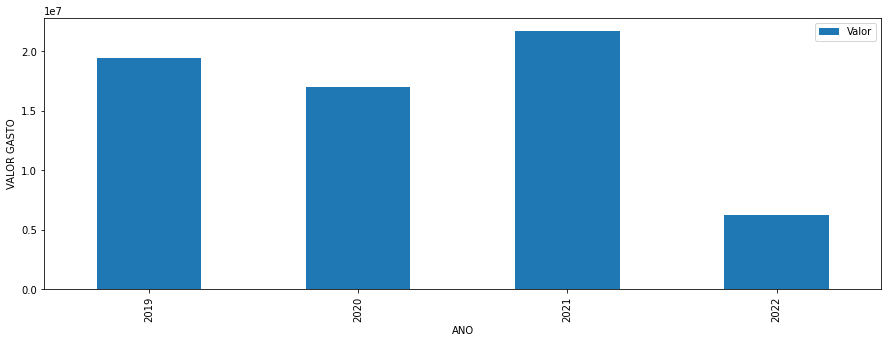

In [36]:
df_despesas_por_ano.plot.bar(figsize=(15,5), xlabel='ANO', ylabel="VALOR GASTO")

## Insight 02: Itens com maiores despezas:

In [29]:
df_maior_despeza = df_despesas_2019a2022.groupby(['Tipo']).agg({'Valor':'sum'})

In [30]:
df_maior_despeza['Valor'].sort_values(ascending=False)

Tipo
L - LOCAÇÃO DE BENS IMÓVEIS                                           12296860.90
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     9253213.14
O - LOCAÇÃO DE VEÍCULO                                                 8743492.65
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       6566819.58
K - LOCAÇÃO DE BENS MÓVEIS                                             5816059.71
A - COMBUSTÍVEIS E LUBRIFICANTES                                       4311466.75
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          3794246.27
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       3257559.86
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              2940892.56
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                    2134901.92
J - SERVIÇOS DE COMUNICAÇÃO                                            1999940.07
N - MORADIA                                                            1786736.19
G - ASSINAT

**OS 3 TIPOS MAIS FORAM GASTOS:**

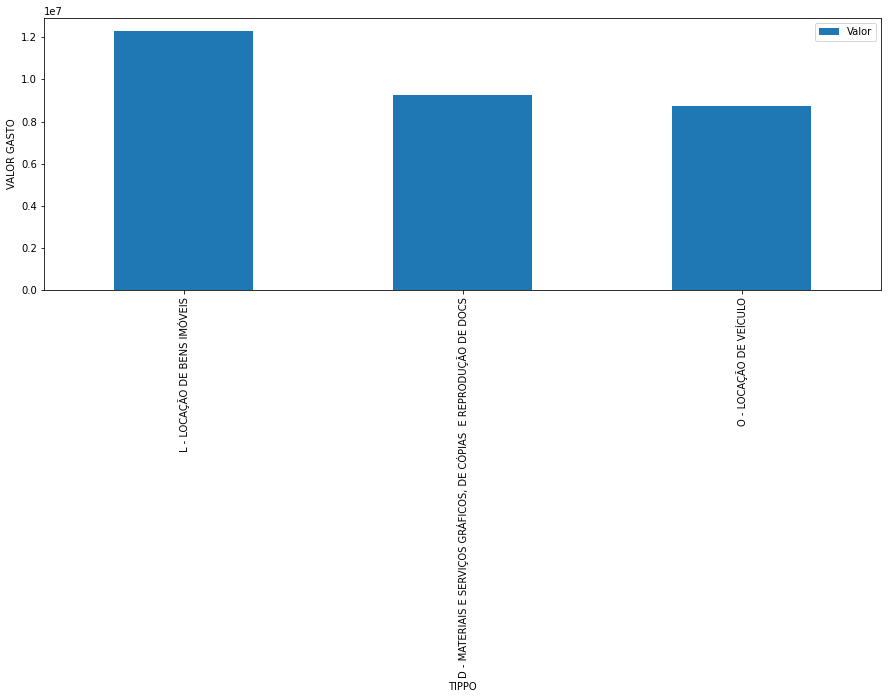

In [31]:
df_maior_despeza.nlargest(3, 'Valor').plot.bar(figsize=(15,5), xlabel='TIPO', ylabel="VALOR GASTO")

## Insitght 03: 3 deputados que mais e menos gastaram 

**OS 3 DEPUTADOS QUE MAIS GASTARAM:**

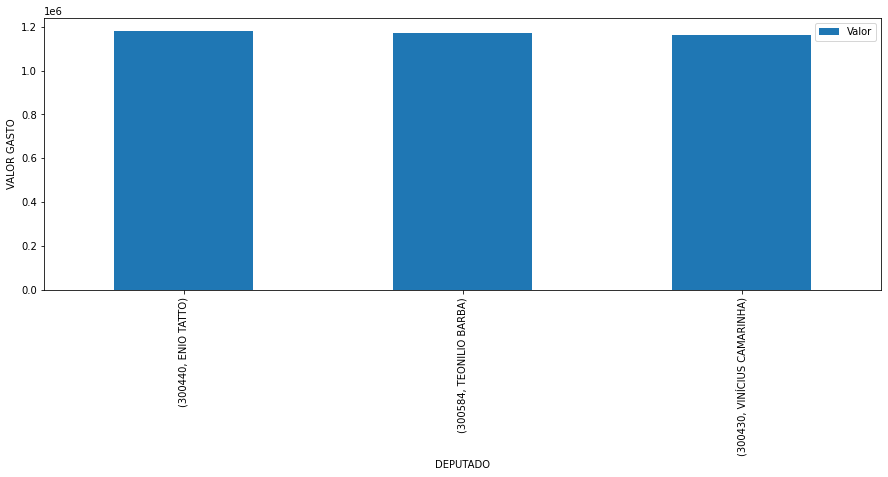

In [32]:
df_maior_valor.nlargest(3, 'Valor').plot.bar(figsize=(15,5), xlabel='DEPUTADO', ylabel="VALOR GASTO")

**OS 3 DEPUTADOS QUE MENOS GASTARAM:**

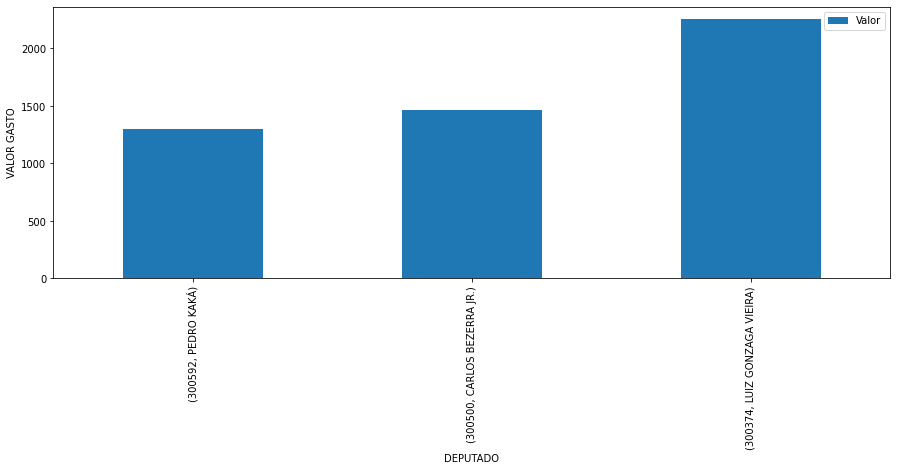

In [33]:
df_maior_valor.nsmallest(3, 'Valor').plot.bar(figsize=(15,5), xlabel='DEPUTADO', ylabel="VALOR GASTO")

## Insight 04: Fornecedor (unico) mais caro

In [46]:
df_despesas_2019a2022['Valor'].max()

18040.78

Com o .max descobrimos qual foi a maior despesa(unica),
agora descobriremos qual é o deputado que gastou isso:
Deputado: Marcio Nakahsima
Tipo: L - Locação de bens imóveis
Fornecedor: Marcos Carvalho Elias

In [47]:
df_despesas_2019a2022.loc[df_despesas_2019a2022['Valor'] == 18040.78]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
305275,2022,300635,3,18040.78,09167845843,MARCIO NAKASHIMA,L - LOCAÇÃO DE BENS IMÓVEIS,MARCOS CARVALHO ELIAS


## Insight 05: Partidos que mais gastaram

In [80]:
df_maior_valor.nlargest(3, 'Valor')

,,Valor
Matricula,Deputado,
300440,ENIO TATTO,1180638.64
300584,TEONILIO BARBA,1169566.84
300430,VINÍCIUS CAMARINHA,1164305.11
300533,MARTA COSTA,1148915.74
300549,JORGE WILSON XERIFE DO CONSUMIDOR,1138216.22


Vimos acima os deputados que mais gastaram, agora veremos qual partido eles pertencem:

In [103]:
df_partido = df_cadastro.copy()

In [104]:
df_partido.drop(['IdDeputado', 'IdSPL', 'IdUA', 'Situacao', 'Andar', 'Aniversario', 'Biografia', 'Email', 'PathFoto', 'Sala', 'Telefone', 'Fax', 'HomePage', 'PlacaVeiculo'], axis=1,inplace=True)

In [106]:
df_partido.rename(columns={'NomeParlamentar':'Deputado'}, inplace=True)

In [85]:
df_cadastro.loc[df_cadastro['Matricula'] == 300440]

,Matricula,Deputado,Partido
35,300440,Enio Tatto,PT


In [91]:
df_cadastro.loc[df_cadastro['Matricula'] == 300584]

,Matricula,Deputado,Partido
88,300584,Teonilio Barba,PT


In [90]:
df_cadastro.loc[df_cadastro['Matricula'] == 300430]

,Matricula,Deputado,Partido
91,300430,Vinícius Camarinha,PSDB
